# Sequential

In [ ]:
from tensorflow import keras
import cv2,os
import matplotlib.pyplot as plt
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Model

In [ ]:
from google.colab import drive
from PIL import Image

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path_1 = r'/content/drive/MyDrive/Datos/0-15000/' # Source Folder
path_2 = r'/content/drive/MyDrive/Datos/15001-20000' # Source Folder
path_Clases = r'/content/drive/MyDrive/Datos/VC_Etiquetas.xlsx'

In [ ]:
Clases = pd.read_excel(path_Clases)
Clases = Clases['Etiqueta_Cluster_2']
Clases_Filtradas = Clases[0:20000]
display(Clases_Filtradas)

0        2
1        2
2        0
3        0
4        0
        ..
19995    0
19996    0
19997    2
19998    0
19999    0
Name: Etiqueta_Cluster_2, Length: 20000, dtype: int64

In [ ]:
#Para cargar las imagenes desde una carpeta a una variable
#from PIL import Image
import numpy as np


def load_images_from_folder(folder): 
    images = [] 
    for filename in os.listdir(folder): 
        img = cv2.imread(os.path.join(folder,filename))
        img = np.asarray(img)
        img = np.array(img)
        images.append(img) 
    return images 

In [ ]:
imagenes_entrenamiento = load_images_from_folder(path_1)
imagenes_validacion = load_images_from_folder(path_2)

In [ ]:
imagenes_entrenamiento = np.array(imagenes_entrenamiento)
imagenes_validacion = np.array(imagenes_validacion)

In [ ]:
imagenes_entrenamiento.shape

(15001, 150, 150, 3)

In [ ]:
imagenes_validacion.shape

(5000, 150, 150, 3)

In [ ]:
imagenes_entrenamiento = imagenes_entrenamiento.astype('float32')

In [ ]:
imagenes_validacion = imagenes_validacion.astype('float32')

In [ ]:
Clases_Filtradas_Train = Clases_Filtradas[0:15001]
Clases_Filtradas_Test = Clases_Filtradas[15000:20000]

In [ ]:
from keras.utils import np_utils

Clases_Filtradas_Train = np_utils.to_categorical(Clases_Filtradas_Train)
Clases_Filtradas_Test = np_utils.to_categorical(Clases_Filtradas_Test)

In [ ]:
Num_Clases = Clases_Filtradas_Test.shape[1]

In [ ]:
Clases_Filtradas_Train.shape

(15001, 3)

In [ ]:
Clases_Filtradas_Test.shape

(5000, 3)

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(input_shape=(150, 150, 3), kernel_size=(2, 2), padding='same', strides=(2, 2), filters=32))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))

model.add(keras.layers.Conv2D(kernel_size=(2, 2), padding='same', strides=(2, 2), filters=64))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='same'))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Dense(3, activation='softmax'))

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 75, 75, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 38, 38, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 38, 38, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 92416)             0         
                                                                 
 dense (Dense)               (None, 256)               2

In [ ]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [ ]:
import numpy as np

modelo_CNN = model.fit(imagenes_entrenamiento, Clases_Filtradas_Train, validation_data=(imagenes_validacion,Clases_Filtradas_Test), 
                    epochs = 30, batch_size=32)

Epoch 1/30
469/469 [==============================] - 18s 16ms/step - loss: 1.0558 - accuracy: 0.4607 - val_loss: 1.0120 - val_accuracy: 0.4494
Epoch 2/30
469/469 [==============================] - 7s 14ms/step - loss: 0.9214 - accuracy: 0.5127 - val_loss: 1.0017 - val_accuracy: 0.4494
Epoch 3/30
469/469 [==============================] - 6s 13ms/step - loss: 0.9048 - accuracy: 0.5277 - val_loss: 1.0066 - val_accuracy: 0.4494
Epoch 4/30
469/469 [==============================] - 6s 14ms/step - loss: 0.8991 - accuracy: 0.5332 - val_loss: 0.9935 - val_accuracy: 0.4494
Epoch 5/30
469/469 [==============================] - 6s 13ms/step - loss: 0.8950 - accuracy: 0.5326 - val_loss: 0.9932 - val_accuracy: 0.4494
Epoch 6/30
469/469 [==============================] - 6s 13ms/step - loss: 0.8955 - accuracy: 0.5300 - val_loss: 0.9997 - val_accuracy: 0.4494
Epoch 7/30
469/469 [==============================] - 6s 14ms/step - loss: 0.8944 - accuracy: 0.5329 - val_loss: 1.0129 - val_accuracy: 0.449

In [ ]:
modelo_CNN.history

{'accuracy': [0.4607026278972626,
  0.5126991271972656,
  0.5276981592178345,
  0.5332311391830444,
  0.5325645208358765,
  0.5300313234329224,
  0.5328978300094604,
  0.5364308953285217,
  0.5336310863494873,
  0.5357642769813538,
  0.5347643494606018,
  0.5350976586341858,
  0.5345643758773804,
  0.5390307307243347,
  0.5396307110786438,
  0.5388973951339722,
  0.5390307307243347,
  0.5387640595436096,
  0.5389640927314758,
  0.5390973687171936,
  0.5384974479675293,
  0.5400973558425903,
  0.5396973490715027,
  0.5400973558425903,
  0.5402973294258118,
  0.5405639410018921,
  0.5404973030090332,
  0.5405639410018921,
  0.5407639741897583,
  0.5402306318283081],
 'loss': [1.0558041334152222,
  0.9213678240776062,
  0.9048129320144653,
  0.8991450667381287,
  0.8950065970420837,
  0.8955143690109253,
  0.8943611979484558,
  0.8924432992935181,
  0.8923335671424866,
  0.8922117352485657,
  0.8908833265304565,
  0.8900468349456787,
  0.8903713226318359,
  0.8891541957855225,
  0.8896327

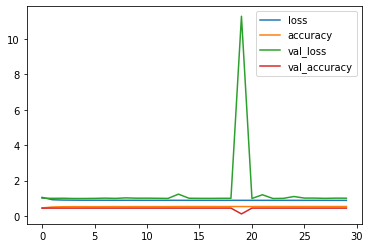

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(modelo_CNN.history).plot()
plt.show()

In [ ]:
puntaje = model.evaluate(imagenes_validacion, Clases_Filtradas_Test)
print("Accuracy: %.2f%%" % (puntaje[1]*100))

157/157 [==============================] - 1s 7ms/step - loss: 1.0096 - accuracy: 0.4494
Accuracy: 44.94%


In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
predictions = model.predict(imagenes_validacion)
y_pred = predictions
y_pred = y_pred.astype(int)
y_true = Clases_Filtradas_Test

In [ ]:
y_pred = y_pred.argmax(axis=1)
y_true = y_true.argmax(axis=1)

In [ ]:
conf_mat = confusion_matrix(y_true, y_pred)
print((conf_mat))

[[2247    0    0]
 [ 612    0    0]
 [2141    0    0]]


In [ ]:
print(metrics.classification_report(y_true, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.449     1.000     0.620      2247
           1      0.000     0.000     0.000       612
           2      0.000     0.000     0.000      2141

    accuracy                          0.449      5000
   macro avg      0.150     0.333     0.207      5000
weighted avg      0.202     0.449     0.279      5000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
